In [1]:
import datacube
acube = datacube.Datacube(app='boku', env='acube')

/app/opt/venv/lib/python3.8/site-packages/datacube/drivers/postgres/_connections.py:81: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  EngineUrl(


In [2]:
import datetime
from datetime import timedelta, date
from datacube.utils.cog import write_cog
from pylab import *
import numpy as np
import os
import matplotlib.colors as clr
import itertools
import csv

In [4]:
def query_data (latitude, longitude, date):
    query = {
        'product': 'B_Sentinel_2',
        'output_crs': 'EPSG:32633',
        'resolution': (-10, 10),
        'lon': longitude,
        'lat': latitude,
        'time': date,
        'measurements': ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12'],
        'cloud_cover_percentage': (0.0, 50.0)
    }
    data = acube.load(**query)
    data_array = np.array(data.to_array(), dtype='float')
    for dataset in acube.find_datasets_lazy(**query):
        geo = dataset.metadata_doc['extent']['coord']['ll']
    return data_array, geo

In [6]:
longitude, latitude = ((13.188319446101904, 13.270605126288197),(45.79732853116177, 45.96216938579245))
array, geo = query_data(latitude, longitude, '2019-06-05')

In [8]:
array.shape

(10, 1, 1846, 680)

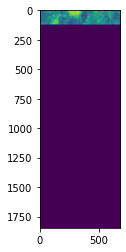

In [9]:
plt.imshow(array[0][0])